In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
RANDOM_STATE = 110

train_data = pd.read_csv("C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/train_data.csv")
test_data = pd.read_csv("C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/test_data.csv")

In [4]:
def plot_box(dataframe, column_name):
    """
    주어진 데이터프레임과 열 이름에 대해 박스 플롯을 그리는 함수.

    Parameters:
    dataframe (pd.DataFrame): 데이터프레임
    column_name (str): 열 이름
    """
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataframe[column_name], vert=False)
    plt.xlabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()

In [5]:
import pandas as pd

def value_counts_ratio_count(df, col_name, target_name):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 비율과 갯수, 총 갯수를 출력하는 함수.

    Parameters:
    df (pd.DataFrame): 데이터프레임
    col_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    """
    # 각 값마다 타겟 변수의 비율 계산
    value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
    
    # 각 값마다 타겟 변수의 갯수 계산
    counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)
    
    # 각 값마다 총 갯수 계산
    total_counts = df[col_name].value_counts().rename('Total_Count')
    
    # 비율과 갯수를 합침
    result = value_counts.join(counts, lsuffix='_ratio', rsuffix='_count')
    
    # 총 갯수를 합침
    result = result.join(total_counts, on=col_name)
    
    # 출력 형식 조정
    result.index.name = 'variable'
    print(f"\n{col_name}별 {target_name} 비율 및 갯수\n")
    print(result.rename(columns=lambda x: x.split('_')[0]))

In [6]:
def summarize_grouped_data(df, group_by_columns):
    # 데이터프레임을 그룹화
    grouped_df = df.groupby(group_by_columns)
    
    # 결과를 저장할 리스트 초기화
    results = []
    
    # 그룹화된 데이터프레임의 내용을 확인하는 코드
    for name, group in grouped_df:
        # 그룹의 갯수 계산
        group_count = group.shape[0]
        
        # 'target' 변수의 'AdNormal' 비율과 갯수 계산
        adnormal_count = group['target'].value_counts().get('AbNormal', 0)
        adnormal_ratio = adnormal_count / group_count
        
        # 결과 리스트에 추가
        results.append([name, adnormal_count, adnormal_ratio, group_count])
    
    # 결과 리스트를 데이터프레임으로 변환
    results_df = pd.DataFrame(results, columns=['group', "'AdNormal' count", 'ratio', 'Total'])
    
    # 그룹화된 변수들의 이름을 제목행으로 출력
    print(f"Grouped by: {', '.join(group_by_columns)}")
    print()
    # 데이터프레임 출력
    print(results_df)
    
    return results_df

In [7]:
def plot_abnormal_ratio(dataframe, column_name, target_name, target_value, bins=20):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 특정 값 비율을 계산하고 막대그래프로 표시하는 함수.

    Parameters:
    dataframe (pd.DataFrame): 데이터프레임
    column_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    target_value (str): 타겟 변수의 특정 값
    bins (int): 구간의 수 (기본값은 20)
    """
    def abnormal_ratio(dataframe, column_name, target_name, target_value):
        """
        주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 특정 값 비율을 계산하는 함수.

        Parameters:
        dataframe (pd.DataFrame): 데이터프레임
        column_name (str): 열 이름
        target_name (str): 타겟 변수 이름
        target_value (str): 타겟 변수의 특정 값

        Returns:
        pd.DataFrame: 각 값마다 타겟 변수의 특정 값 비율을 포함하는 데이터프레임
        """
        # 각 값마다 타겟 변수의 특정 값 비율 계산
        value_counts = dataframe.groupby(column_name)[target_name].apply(lambda x: (x == target_value).mean()).reset_index()
        count_counts = dataframe.groupby(column_name)[target_name].count().reset_index()
        
        value_counts.columns = [column_name, 'ratio']
        count_counts.columns = [column_name, 'count']
        
        # 비율과 카운트를 병합
        result = pd.merge(value_counts, count_counts, on=column_name)
        return result

    # column_name 값을 지정된 구간으로 나누기
    dataframe[f'{column_name}_bins'] = pd.cut(dataframe[column_name], bins=bins)

    # 비율 계산
    ratios = abnormal_ratio(dataframe, f'{column_name}_bins', target_name, target_value)

    # 막대그래프 그리기
    plt.figure(figsize=(20, 10))
    barplot = sns.barplot(x=f'{column_name}_bins', y='ratio', data=ratios, color='skyblue')
    plt.xlabel(f'{column_name} (binned)')
    plt.ylabel('AbNormal Ratio')
    plt.title(f'AbNormal Ratio by {column_name} (binned)', pad=30)  # 제목과 그래프 사이의 간격 조정
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    # 각 막대 위에 비율 값과 카운트 표시
    for p in barplot.patches:
        # 막대의 x 좌표에 해당하는 구간을 찾기
        bin_label = ratios[f'{column_name}_bins'].cat.categories[int(p.get_x() + p.get_width() / 2) - 1]
        count_value = ratios.loc[ratios[f'{column_name}_bins'] == bin_label, 'count'].values[0]
        barplot.annotate(f'{format(p.get_height(), ".2f")} ({count_value})', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 9), 
                         textcoords='offset points')

    plt.show()

    # _bins 변수 드랍
    dataframe.drop(columns=[f'{column_name}_bins'], inplace=True)


In [8]:
# train_data와 test_data에서 '?'를 포함하는 열 이름 필터링
train_Process_Desc_col = train_data.filter(like='?').columns
test_Process_Desc_col = test_data.filter(like='?').columns

# 필터링된 열 이름 출력
print("<? column in train_data>")
for col in train_Process_Desc_col:
    print(col)

print("<? column in test_data>")
for col in test_Process_Desc_col:
    print(col)

# ? -> Θ로 변경할 열 이름과 새 열 이름 생성
train_new_columns = {col: col.replace('?', 'Θ') for col in train_Process_Desc_col}
test_new_columns = {col: col.replace('?', 'Θ') for col in test_Process_Desc_col}

# 열 이름 변경
train_data.rename(columns=train_new_columns, inplace=True)
test_data.rename(columns=test_new_columns, inplace=True)

# 'Θ'를 포함하는 열 이름 필터링
train_Process_Desc_col = train_data.filter(like='Θ').columns
test_Process_Desc_col = test_data.filter(like='Θ').columns

# 필터링된 열 이름 출력
print("<Θ in train_data>")
print("train_data:")
for col in train_Process_Desc_col:
    print(col)

print("test_data:")
for col in test_Process_Desc_col:
    print(col)

<? column in train_data>
CURE END POSITION ? Collect Result_Dam
CURE START POSITION ? Collect Result_Dam
<? column in test_data>
<Θ in train_data>
train_data:
CURE END POSITION Θ Collect Result_Dam
CURE START POSITION Θ Collect Result_Dam
test_data:
CURE END POSITION Θ Collect Result_Dam
CURE START POSITION Θ Collect Result_Dam


In [9]:
# '_Dam'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_Dam').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
CURE END POSITION X Collect Result_Dam
CURE END POSITION Z Collect Result_Dam
CURE END POSITION Θ Collect Result_Dam
CURE SPEED Collect Result_Dam
CURE START POSITION X Collect Result_Dam
CURE START POSITION Θ Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE Z AXIS(

CURE END POSITION 변수 분석

In [10]:
train_data['CURE POSITION X DISTANCE'] = train_data['CURE END POSITION X Collect Result_Dam'] - train_data['CURE START POSITION X Collect Result_Dam']

In [11]:
train_data['CURE POSITION X DISTANCE'].value_counts()

CURE POSITION X DISTANCE
-790    25030
 720    15476
Name: count, dtype: int64

CURE POSITION X 변수는 불량품을 분류하는데 중요하지 않은 변수일 가능성이 높다.

In [12]:
value_counts_ratio_count(train_data, 'CURE POSITION X DISTANCE', 'target')


CURE POSITION X DISTANCE별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
-790      0.059329  0.940671      1485   23545  25030
 720      0.055893  0.944107       865   14611  15476


POSITION Θ의 경우에는 Start와 End가 동일하다.

In [13]:
summary_df = summarize_grouped_data(train_data, ['CURE END POSITION Θ Collect Result_Dam','CURE START POSITION Θ Collect Result_Dam'])

Grouped by: CURE END POSITION Θ Collect Result_Dam, CURE START POSITION Θ Collect Result_Dam

        group  'AdNormal' count     ratio  Total
0  (-90, -90)              1485  0.059329  25030
1    (90, 90)               865  0.055893  15476


 CURE SPEED 분석

CURE Speed가 95일 때 불량률이 가장 낮았다. Cure speed 변수의 경우에는 (70,85), 95, (100,105) 이런식으로 그룹화해줘도 좋을 듯?

In [14]:
value_counts_ratio_count(train_data, 'CURE SPEED Collect Result_Dam', 'target')


CURE SPEED Collect Result_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
70        0.059601  0.940399      2052   32377  34429
85        0.057388  0.942612       127    2086   2213
95        0.025157  0.974843         4     155    159
100       0.045036  0.954964        93    1972   2065
105       0.045122  0.954878        74    1566   1640


DISPENSE volumne 변수 분석

In [15]:
train_data['Dispense Volume(Stage1) Collect Result_Dam'].value_counts()
train_data['Dispense Volume(Stage2) Collect Result_Dam'].value_counts()

Dispense Volume(Stage2) Collect Result_Dam
0.34    10312
0.58     4719
0.27     3333
0.73     2458
0.56     2089
0.72     1959
0.74     1824
0.57     1618
0.46     1547
0.53     1503
0.92     1206
0.71     1198
0.35      998
0.52      990
0.93      803
0.60      781
0.59      762
0.94      718
0.33      513
0.45      393
0.37      275
0.38      165
0.26      109
0.50       75
0.55       54
0.49       34
0.28       27
0.89       15
0.90       12
0.91       10
0.40        3
0.41        2
0.48        1
Name: count, dtype: int64

In [16]:
# Define the new bins for grouping the data
bins = [0.6, 0.9, 1.0, 3.0]
labels = ['0.6~0.9', '0.9~1.0', '1.0~3.0']

# Bin the data with the new ranges
train_data['Dispense Volume(Stage1) Group'] = pd.cut(train_data['Dispense Volume(Stage1) Collect Result_Dam'], bins=bins, labels=labels, right=False)

# Get the count of each group
grouped_counts = train_data['Dispense Volume(Stage1) Group'].value_counts()
grouped_counts

Dispense Volume(Stage1) Group
1.0~3.0    19831
0.9~1.0    10667
0.6~0.9    10008
Name: count, dtype: int64

In [17]:
Dispense_volume1 = value_counts_ratio_count(train_data, 'Dispense Volume(Stage1) Group', 'target')
Dispense_volume1


Dispense Volume(Stage1) Group별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
0.6~0.9   0.084432  0.915568       845    9163  10008
0.9~1.0   0.044811  0.955189       478   10189  10667
1.0~3.0   0.051788  0.948212      1027   18804  19831


C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_13536\3660094726.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_13536\3660094726.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)


In [18]:
# Displaying the value counts for the "Dispense Volume(Stage2) Collect Result_Dam" variable
value_counts_stage2 = train_data['Dispense Volume(Stage2) Collect Result_Dam'].value_counts()

value_counts_stage2

Dispense Volume(Stage2) Collect Result_Dam
0.34    10312
0.58     4719
0.27     3333
0.73     2458
0.56     2089
0.72     1959
0.74     1824
0.57     1618
0.46     1547
0.53     1503
0.92     1206
0.71     1198
0.35      998
0.52      990
0.93      803
0.60      781
0.59      762
0.94      718
0.33      513
0.45      393
0.37      275
0.38      165
0.26      109
0.50       75
0.55       54
0.49       34
0.28       27
0.89       15
0.90       12
0.91       10
0.40        3
0.41        2
0.48        1
Name: count, dtype: int64

In [19]:
# Define the new bins for grouping the data
bins = [0.2, 0.4, 0.6, 1.0]
labels = ['0.2~0.4', '0.4~0.6', '0.6~1.0']

# Bin the data with the new ranges
train_data['Dispense Volume(Stage2) Group'] = pd.cut(train_data['Dispense Volume(Stage2) Collect Result_Dam'], bins=bins, labels=labels, right=False)

# Get the count of each group
grouped_counts = train_data['Dispense Volume(Stage2) Group'].value_counts()

grouped_counts

Dispense Volume(Stage2) Group
0.2~0.4    15732
0.4~0.6    13790
0.6~1.0    10984
Name: count, dtype: int64

In [20]:
Dispense_volume2 = value_counts_ratio_count(train_data, 'Dispense Volume(Stage2) Group', 'target')
Dispense_volume2


Dispense Volume(Stage2) Group별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
0.2~0.4   0.075515  0.924485      1188   14544  15732
0.4~0.6   0.044380  0.955620       612   13178  13790
0.6~1.0   0.050073  0.949927       550   10434  10984


C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_13536\3660094726.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_13536\3660094726.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)


In [21]:
# Displaying the value counts for the "Dispense Volume(Stage3) Collect Result_Dam" variable
value_counts_stage3 = train_data['Dispense Volume(Stage3) Collect Result_Dam'].value_counts()

# Display the results
value_counts_stage3

Dispense Volume(Stage3) Collect Result_Dam
1.49    29212
0.92     6694
0.91     1704
0.99      872
1.00      514
1.02      472
0.95      319
0.96      260
1.61      239
0.94      133
1.03       51
1.62       36
Name: count, dtype: int64

In [22]:
Dispense_volume1 = value_counts_ratio_count(train_data, 'Dispense Volume(Stage3) Collect Result_Dam', 'target')


Dispense Volume(Stage3) Collect Result_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal   Normal  Total
variable                                              
0.91      0.041080  0.958920      70.0   1634.0   1704
0.92      0.047655  0.952345     319.0   6375.0   6694
0.94      0.007519  0.992481       1.0    132.0    133
0.95      0.025078  0.974922       8.0    311.0    319
0.96      0.053846  0.946154      14.0    246.0    260
0.99      0.045872  0.954128      40.0    832.0    872
1.00      0.046693  0.953307      24.0    490.0    514
1.02      0.025424  0.974576      12.0    460.0    472
1.03      0.000000  1.000000       0.0     51.0     51
1.49      0.063467  0.936533    1854.0  27358.0  29212
1.61      0.029289  0.970711       7.0    232.0    239
1.62      0.027778  0.972222       1.0     35.0     36


HEAD NORMAL COORDINATE 변수 분석

CURE position X와 head normal coordinate X와의 관계

In [23]:
summary_df = summarize_grouped_data(train_data, ['CURE END POSITION X Collect Result_Dam',
                                                 'CURE START POSITION X Collect Result_Dam'
                                                 , 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'
                                                 ])

Grouped by: CURE END POSITION X Collect Result_Dam, CURE START POSITION X Collect Result_Dam, HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam

                 group  'AdNormal' count     ratio  Total
0   (240, 1030, 548.5)                 4  0.153846     26
1   (240, 1030, 548.9)                21  0.024911    843
2   (240, 1030, 549.0)               647  0.088984   7271
3   (240, 1030, 549.4)                15  0.033632    446
4   (240, 1030, 549.5)               111  0.087886   1263
5   (240, 1030, 550.0)               126  0.052544   2398
6   (240, 1030, 550.3)               143  0.037861   3777
7   (240, 1030, 550.4)               135  0.057447   2350
8   (240, 1030, 550.5)                43  0.057564    747
9   (240, 1030, 550.6)                67  0.038003   1763
10  (240, 1030, 550.7)                 2  0.030303     66
11  (240, 1030, 551.0)                 0  0.000000      1
12  (240, 1030, 551.2)                 4  0.039604    101
13  (240, 1030, 551.3)              

Cure start position X가 1030이면 HEAD NORMAL COORDINATE X AXIS(Stage1)는 548.5~552.1 사이였고 280인 경우에는 161.2~164.5 사이였다.

In [24]:
# Adjust the bins by removing the duplicate edge (163.5)
bins = [161, 162, 163, 163.5, 164, 164.5, 165, 548, 549, 549.5, 550, 550.5, 551, 551.5, 552.5]
labels = ['161~162', '162~163', '163~163.5', '163.5~164', '164~164.5', '164.5~165', '165~548', '548~549', '549~549.5', '549.5~550', '550~550.5', '550.5~551', '551~551.5', '551.5~552.5']

# Bin the data with the adjusted ranges
train_data['HEAD NORMAL COORDINATE X AXIS(Stage1)'] = pd.cut(train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'], bins=bins, labels=labels, right=False)

# Get the count of each group
grouped_counts = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1)'].value_counts()

grouped_counts

HEAD NORMAL COORDINATE X AXIS(Stage1)
162~163        9521
550~550.5      8525
549~549.5      7717
551.5~552.5    3851
164~164.5      3090
550.5~551      2576
161~162        1315
549.5~550      1263
548~549         869
163.5~164       825
164.5~165       376
163~163.5       349
551~551.5       229
165~548           0
Name: count, dtype: int64

In [25]:
HEAD_NORMAL_COORDINATE_X_AXIS_stage1 = value_counts_ratio_count(train_data, 'HEAD NORMAL COORDINATE X AXIS(Stage1)', 'target')



HEAD NORMAL COORDINATE X AXIS(Stage1)별 target 비율 및 갯수

             AbNormal    Normal  AbNormal  Normal  Total
variable                                                
161~162      0.033460  0.966540        44    1271   1315
162~163      0.052831  0.947169       503    9018   9521
163~163.5    0.174785  0.825215        61     288    349
163.5~164    0.050909  0.949091        42     783    825
164~164.5    0.061489  0.938511       190    2900   3090
164.5~165    0.066489  0.933511        25     351    376
165~548      0.000000  0.000000         0       0      0
548~549      0.028769  0.971231        25     844    869
549~549.5    0.085785  0.914215       662    7055   7717
549.5~550    0.087886  0.912114       111    1152   1263
550~550.5    0.047390  0.952610       404    8121   8525
550.5~551    0.043478  0.956522       112    2464   2576
551~551.5    0.043668  0.956332        10     219    229
551.5~552.5  0.041807  0.958193       161    3690   3851


C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_13536\3660094726.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_13536\3660094726.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)


HEAD COORDINATE Y와 CURE END POSITION Z간의 관계

In [26]:
value_counts_ratio_count(train_data, 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam', 'CURE END POSITION Z Collect Result_Dam')


HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam별 CURE END POSITION Z Collect Result_Dam 비율 및 갯수

          2.5  12.5      2.5     12.5  Total
variable                                    
377.3     1.0   0.0   4678.0      0.0   4678
377.5     1.0   0.0   8560.0      0.0   8560
377.6     1.0   0.0  10764.0      0.0  10764
384.0     1.0   0.0   1028.0      0.0   1028
1269.0    0.0   1.0      0.0   1779.0   1779
1271.3    0.0   1.0      0.0   1056.0   1056
1271.8    0.0   1.0      0.0  11210.0  11210
1272.1    0.0   1.0      0.0    281.0    281
1273.8    0.0   1.0      0.0     64.0     64
1280.8    0.0   1.0      0.0     59.0     59
1281.0    0.0   1.0      0.0    535.0    535
1281.2    0.0   1.0      0.0    230.0    230
1281.3    0.0   1.0      0.0     93.0     93
1281.8    0.0   1.0      0.0    169.0    169


In [27]:
Head_Normal_Coordinate_Y = value_counts_ratio_count(train_data, 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam', 'target')


HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal   Normal  Total
variable                                              
377.3     0.046815  0.953185     219.0   4459.0   4678
377.5     0.089019  0.910981     762.0   7798.0   8560
377.6     0.041992  0.958008     452.0  10312.0  10764
384.0     0.050584  0.949416      52.0    976.0   1028
1269.0    0.088252  0.911748     157.0   1622.0   1779
1271.3    0.050189  0.949811      53.0   1003.0   1056
1271.8    0.048974  0.951026     549.0  10661.0  11210
1272.1    0.032028  0.967972       9.0    272.0    281
1273.8    0.671875  0.328125      43.0     21.0     64
1280.8    0.000000  1.000000       0.0     59.0     59
1281.0    0.037383  0.962617      20.0    515.0    535
1281.2    0.069565  0.930435      16.0    214.0    230
1281.3    0.086022  0.913978       8.0     85.0     93
1281.8    0.059172  0.940828      10.0    159.0    169


HEAD COORDINATE Z 분석

In [28]:
train_data['HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam'].value_counts()

HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
282.150    13573
284.800     7769
274.330     2855
274.510     2841
282.500     1999
282.343     1984
282.361     1441
280.894     1261
281.095     1211
274.200      847
274.400      802
284.600      793
281.517      408
281.430      408
273.800      406
281.413      399
274.000      394
274.780      381
281.324      334
281.226      148
281.222      132
281.300       55
281.513       36
281.424       29
Name: count, dtype: int64

In [29]:
Head_Normal_Coordinate_Z = value_counts_ratio_count(train_data, 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam', 'target')


HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal   Normal  Total
variable                                              
273.800   0.046798  0.953202      19.0    387.0    406
274.000   0.063452  0.936548      25.0    369.0    394
274.200   0.038961  0.961039      33.0    814.0    847
274.330   0.055342  0.944658     158.0   2697.0   2855
274.400   0.034913  0.965087      28.0    774.0    802
274.510   0.043295  0.956705     123.0   2718.0   2841
274.780   0.044619  0.955381      17.0    364.0    381
280.894   0.052339  0.947661      66.0   1195.0   1261
281.095   0.050372  0.949628      61.0   1150.0   1211
281.222   0.106061  0.893939      14.0    118.0    132
281.226   0.033784  0.966216       5.0    143.0    148
281.300   0.036364  0.963636       2.0     53.0     55
281.324   0.023952  0.976048       8.0    326.0    334
281.413   0.020050  0.979950       8.0    391.0    399
281.424   0.000000  1.000000       0.0     29

In [30]:
# Adjust the bins by removing the duplicate edge (163.5)
bins = [273, 274, 274.5, 281, 282, 283, 285]
labels = ['273~274', '274~274.5', '274.5~281', '281~282', '282~283', '283~285']

# Bin the data with the adjusted ranges
train_data['HEAD NORMAL COORDINATE Z AXIS(Stage1)'] = pd.cut(train_data['HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam'], bins=bins, labels=labels, right=False)

# Get the count of each group
grouped_counts = train_data['HEAD NORMAL COORDINATE Z AXIS(Stage1)'].value_counts()

grouped_counts

HEAD NORMAL COORDINATE Z AXIS(Stage1)
282~283      18997
283~285       8562
274~274.5     4898
274.5~281     4483
281~282       3160
273~274        406
Name: count, dtype: int64

In [31]:
Head_Normal_Coordinate_Z_ = value_counts_ratio_count(train_data, 'HEAD NORMAL COORDINATE Z AXIS(Stage1)', 'target')


HEAD NORMAL COORDINATE Z AXIS(Stage1)별 target 비율 및 갯수

           AbNormal    Normal  AbNormal  Normal  Total
variable                                              
273~274    0.046798  0.953202        19     387    406
274~274.5  0.049816  0.950184       244    4654   4898
274.5~281  0.045951  0.954049       206    4277   4483
281~282    0.039873  0.960127       126    3034   3160
282~283    0.052271  0.947729       993   18004  18997
283~285    0.088998  0.911002       762    7800   8562


C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_13536\3660094726.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_13536\3660094726.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)


Thickness 변수

Thickness 변수의 경우에는 1이 정해지면 2,3도 하나의 고유값을 가지기 때문에 변수 하나만 사용해도 될 듯

In [33]:
Thickness_1 = value_counts_ratio_count(train_data, 'THICKNESS 1 Collect Result_Dam', 'target')


THICKNESS 1 Collect Result_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
-0.054    0.041855  0.958145        37     847    884
-0.019    0.044876  0.955124        74    1575   1649
-0.015    0.074689  0.925311        72     892    964
 0.000    0.059036  0.940964      2091   33328  35419
 0.012    0.016000  0.984000         2     123    125
 0.014    0.050483  0.949517        68    1279   1347
 0.037    0.050847  0.949153         6     112    118


In [34]:
Thickness_2 = value_counts_ratio_count(train_data, 'THICKNESS 2 Collect Result_Dam', 'target')


THICKNESS 2 Collect Result_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
-0.219    0.041855  0.958145        37     847    884
-0.058    0.051796  0.948204        62    1135   1197
-0.036    0.074689  0.925311        72     892    964
-0.022    0.016000  0.984000         2     123    125
-0.021    0.044876  0.955124        74    1575   1649
 0.000    0.059036  0.940964      2091   33328  35419
 0.005    0.050847  0.949153         6     112    118
 0.007    0.040000  0.960000         6     144    150


In [35]:
train_data['Thickness_sum'] = train_data['THICKNESS 1 Collect Result_Dam'] + train_data['THICKNESS 2 Collect Result_Dam'] + train_data['THICKNESS 3 Collect Result_Dam']

In [36]:
train_data['Thickness_sum'].value_counts()

Thickness_sum
 0.000    35419
-0.158     1649
-0.032     1197
-0.077      964
-0.266      884
 0.033      150
-0.007      125
 0.066      118
Name: count, dtype: int64

In [37]:
Thickness_sum = value_counts_ratio_count(train_data, 'Thickness_sum', 'target')


Thickness_sum별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
-0.266    0.041855  0.958145        37     847    884
-0.158    0.044876  0.955124        74    1575   1649
-0.077    0.074689  0.925311        72     892    964
-0.032    0.051796  0.948204        62    1135   1197
-0.007    0.016000  0.984000         2     123    125
 0.000    0.059036  0.940964      2091   33328  35419
 0.033    0.040000  0.960000         6     144    150
 0.066    0.050847  0.949153         6     112    118


Cicle, Line 변수 분석

In [38]:
# Calculate the average values for Circle and Line in each stage separately
train_data['Stage1 Circle Average'] = train_data[[col for col in train_data.columns if 'Stage1' in col and 'Circle' in col]].mean(axis=1)
train_data['Stage1 Line Average'] = train_data[[col for col in train_data.columns if 'Stage1' in col and 'Line' in col]].mean(axis=1)

train_data['Stage2 Circle Average'] = train_data[[col for col in train_data.columns if 'Stage2' in col and 'Circle' in col]].mean(axis=1)
train_data['Stage2 Line Average'] = train_data[[col for col in train_data.columns if 'Stage2' in col and 'Line' in col]].mean(axis=1)

train_data['Stage3 Circle Average'] = train_data[[col for col in train_data.columns if 'Stage3' in col and 'Circle' in col]].mean(axis=1)
train_data['Stage3 Line Average'] = train_data[[col for col in train_data.columns if 'Stage3' in col and 'Line' in col]].mean(axis=1)

# Display the first few rows to check the new derived variables
train_data[['Stage1 Circle Average', 'Stage1 Line Average', 'Stage2 Circle Average', 'Stage2 Line Average', 'Stage3 Circle Average', 'Stage3 Line Average']].head()

,Stage1 Circle Average,Stage1 Line Average,Stage2 Circle Average,Stage2 Line Average,Stage3 Circle Average,Stage3 Line Average
0,5800.0,5750.0,5300.0,5300.0,5800.0,5800.0
1,4000.0,4000.0,9000.0,9000.0,4000.0,4000.0
2,5800.0,5800.0,5300.0,5300.0,5800.0,5800.0
3,4000.0,4000.0,5000.0,5000.0,4000.0,4000.0
4,9000.0,9000.0,9000.0,9000.0,9000.0,9000.0


In [40]:
# Select the new average variables
avg_variables = [
    'Stage1 Circle Average',
    'Stage1 Line Average',
    'Stage2 Circle Average',
    'Stage2 Line Average',
    'Stage3 Circle Average',
    'Stage3 Line Average'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       Stage1 Circle Average  Stage1 Line Average  \
Stage1 Circle Average               1.000000             0.999464   
Stage1 Line Average                 0.999464             1.000000   
Stage2 Circle Average               0.667348             0.667463   
Stage2 Line Average                 0.663321             0.663359   
Stage3 Circle Average               0.999912             0.999373   
Stage3 Line Average                 0.999422             0.999860   

                       Stage2 Circle Average  Stage2 Line Average  \
Stage1 Circle Average               0.667348             0.663321   
Stage1 Line Average                 0.667463             0.663359   
Stage2 Circle Average               1.000000             0.998491   
Stage2 Line Average                 0.998491             1.000000   
Stage3 Circle Average               0.667726             0.663689   
Stage3 Line Average                 0.666274             0.662208   

            

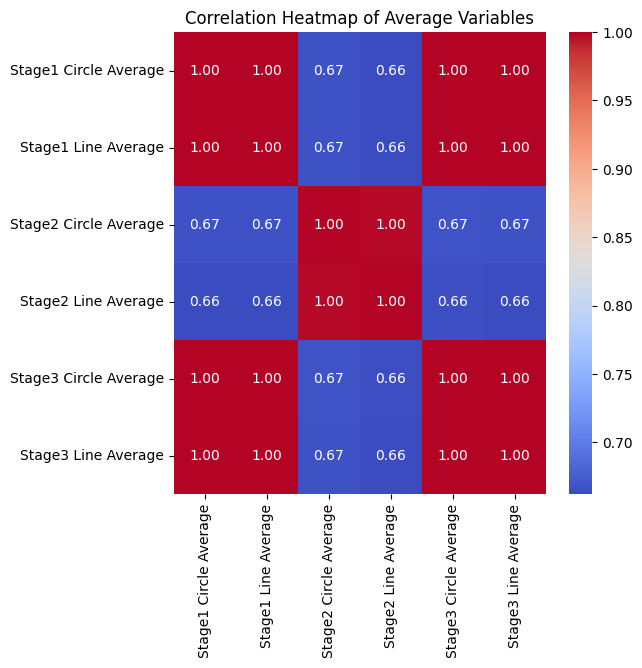

In [43]:
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(6, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

Line, Circle 변수를 분석한 결과 변수들끼리 상관성이 매우 높은 것을 알 수 있다. 따라서 변수 몇 개를 빼도 될 것 같다.